In [1]:
import os

import numpy as np
import torch
from tqdm import tqdm
from matplotlib import pyplot as plt
from shapenet.utils import Config
from shapenet.layer import HomogeneousShapeLayer
from shapenet.networks import SingleShapeNetwork
from shapedata.single_shape import SingleShapeDataProcessing, SingleShapeSingleImage2D
from shapedata.io import pts_exporter
import easydict
import cv2
cap = cv2.VideoCapture(0)

C:\ProgramData\Anaconda3\lib\site-packages\google\protobuf\descriptor.py:47: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from google.protobuf.pyext import _message
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\nest.py:824: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  _pywrap_tensorflow.RegisterType("Sequence", _collections.Sequence)
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\checkpointable\util.py:448: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  class _ObjectIdentitySet(collections.MutableSet):


In [2]:
args = easydict.EasyDict({
    "visualize": True,
    "in_path": './inputs/in',
    "out_path": './outputs',
    "weight_file": './pretrained_face.ptj',
    "config_file": './example_configs/lfpw.config'
})

C:\Users\Administrator\Desktop\shapenet-master\shapenet\utils\load_config_file.py:50: YAMLLoadWarning: calling yaml.load_all() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  for doc in docs:
  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

None


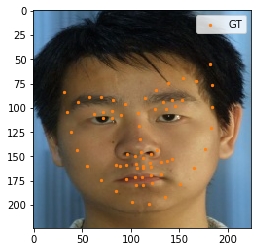

  3%|██▊                                                                                | 1/30 [00:00<00:28,  1.01it/s]

None


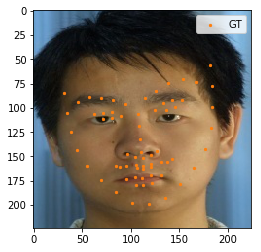

  7%|█████▌                                                                             | 2/30 [00:01<00:27,  1.02it/s]

None


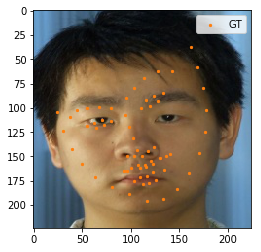

 10%|████████▎                                                                          | 3/30 [00:02<00:26,  1.03it/s]

None


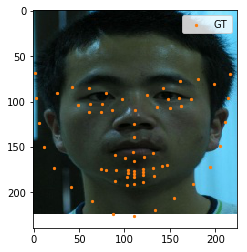

 13%|███████████                                                                        | 4/30 [00:03<00:25,  1.04it/s]

None


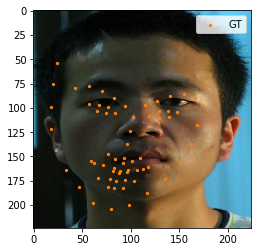

 17%|█████████████▊                                                                     | 5/30 [00:04<00:23,  1.05it/s]

None


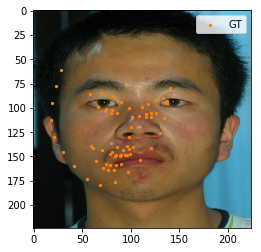

 20%|████████████████▌                                                                  | 6/30 [00:05<00:23,  1.03it/s]

None


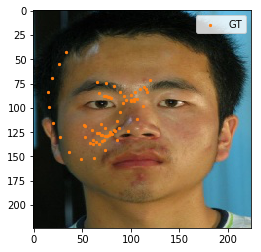

 23%|███████████████████▎                                                               | 7/30 [00:06<00:22,  1.03it/s]

None


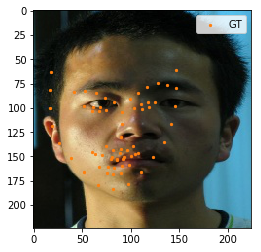

 27%|██████████████████████▏                                                            | 8/30 [00:07<00:22,  1.02s/it]

None


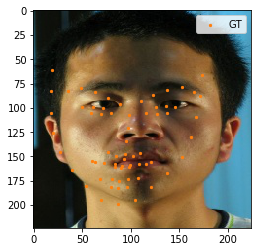

 30%|████████████████████████▉                                                          | 9/30 [00:08<00:21,  1.01s/it]

None


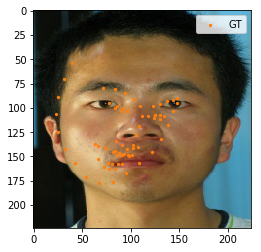

 33%|███████████████████████████▎                                                      | 10/30 [00:09<00:20,  1.01s/it]

None


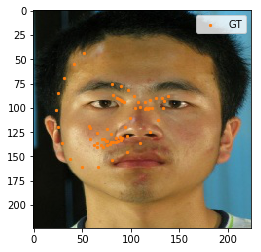

 37%|██████████████████████████████                                                    | 11/30 [00:10<00:18,  1.01it/s]

None


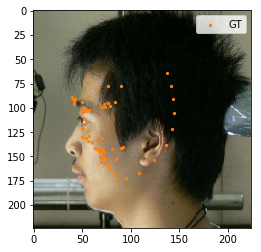

 40%|████████████████████████████████▊                                                 | 12/30 [00:11<00:17,  1.03it/s]

None


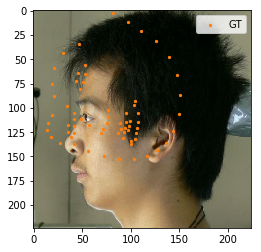

 43%|███████████████████████████████████▌                                              | 13/30 [00:12<00:16,  1.02it/s]

None


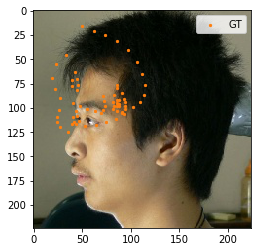

 47%|██████████████████████████████████████▎                                           | 14/30 [00:13<00:15,  1.04it/s]

None


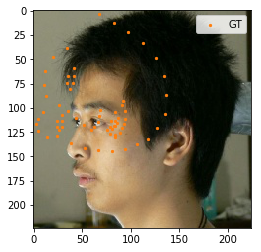

 50%|█████████████████████████████████████████                                         | 15/30 [00:14<00:14,  1.03it/s]

None


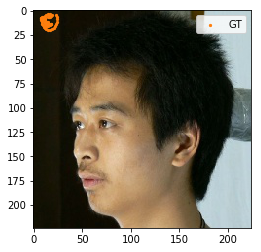

 53%|███████████████████████████████████████████▋                                      | 16/30 [00:15<00:13,  1.04it/s]

None


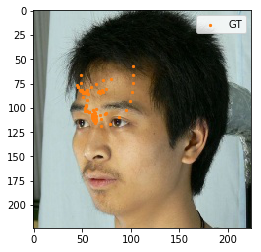

 57%|██████████████████████████████████████████████▍                                   | 17/30 [00:16<00:12,  1.03it/s]

None


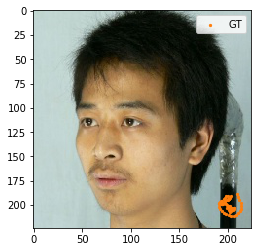

 60%|█████████████████████████████████████████████████▏                                | 18/30 [00:17<00:11,  1.03it/s]

None


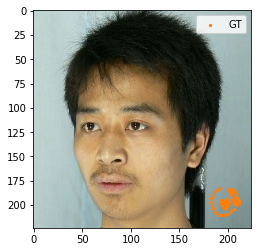

 63%|███████████████████████████████████████████████████▉                              | 19/30 [00:18<00:10,  1.04it/s]

None


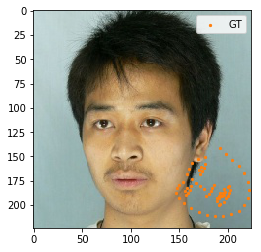

 67%|██████████████████████████████████████████████████████▋                           | 20/30 [00:19<00:09,  1.04it/s]

None


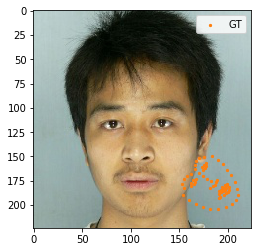

 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [00:20<00:08,  1.05it/s]

None


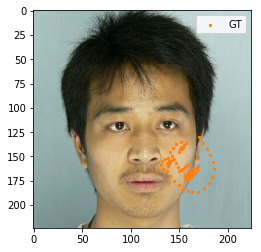

 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [00:21<00:07,  1.03it/s]

None


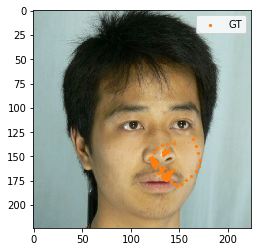

 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [00:22<00:06,  1.05it/s]

None


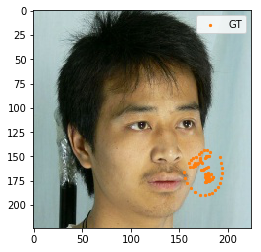

 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [00:23<00:05,  1.05it/s]

None


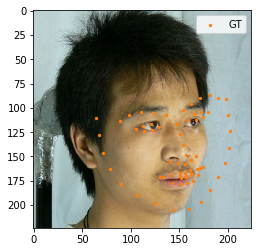

 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [00:24<00:04,  1.06it/s]

None


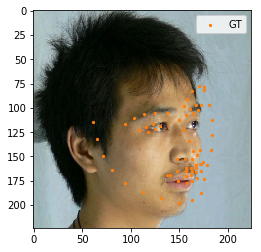

 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [00:25<00:03,  1.06it/s]

None


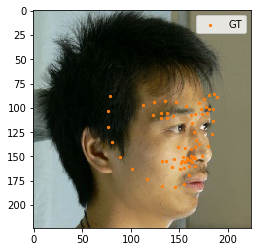

 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [00:26<00:02,  1.05it/s]

None


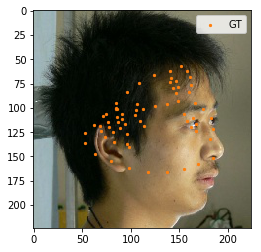

 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [00:27<00:01,  1.05it/s]

None


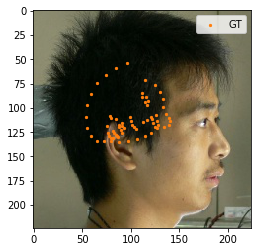

 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [00:28<00:00,  1.04it/s]

None


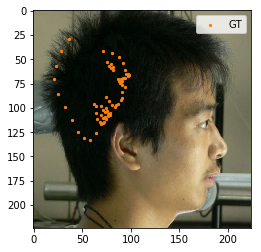

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:28<00:00,  1.05it/s]


In [3]:
"""
Predicts file directory with network specified by files to output path

"""

config = Config()
config_dict = config(os.path.abspath(args.config_file))

try:
    net = torch.jit.load(os.path.abspath(args.weight_file))
    net.eval()
    net.cpu()

except RuntimeError:
    net_layer = HomogeneousShapeLayer

    if config_dict["training"].pop("mixed_prec", False):
        try:
            from apex import amp
            amp.init()
        except:
            pass

    shapes = np.load(os.path.abspath(config_dict["layer"].pop("pca_path"))
                    )["shapes"][:config_dict["layer"].pop("num_shape_params") + 1]

    net = SingleShapeNetwork(
        net_layer, {"shapes": shapes,
                    **config_dict["layer"]},
        img_size=config_dict["data"]["img_size"],
        **config_dict["network"])

    try:
        net.load_state_dict(torch.load(
            os.path.abspath(args.weight_file))["state_dict"]["model"])
    except KeyError:
        net.load_state_dict(torch.load(os.path.abspath(args.weight_file)))

    net = net.to("cpu")
    net = net.eval()

data = SingleShapeDataProcessing._get_files(
    os.path.abspath(args.in_path), extensions=[".png", ".jpg"])

def process_sample(sample, img_size, net, device, crop=0.1):
    print(sample)
    lmk_bounds = sample.get_landmark_bounds(sample.img)
    min_y, min_x, max_y, max_x = lmk_bounds
    range_x = max_x - min_x
    range_y = max_y - min_y

    max_range = max(range_x, range_y) * (1 + crop)

    center_x = min_x + range_x / 2
    center_y = min_y + range_y / 2

    tmp = sample.crop(center_y - max_range / 2,
                    center_x - max_range / 2,
                    center_y + max_range / 2,
                    center_x + max_range / 2)

    img_tensor = torch.from_numpy(
        tmp.to_grayscale().resize((img_size, img_size)).img.transpose(2, 0, 1)
    ).to(torch.float).unsqueeze(0).to(device)

    pred = net(img_tensor).cpu().numpy()[0]

    pred = pred * np.array([max_range / img_size, max_range / img_size])
    pred = pred + np.asarray([center_y - max_range / 2,
                            center_x - max_range / 2])

    return pred

device = torch.device("cpu")

with torch.no_grad():

    if args.visualize:
        pred_path = os.path.join(os.path.abspath(args.out_path), "pred")
        vis_path = os.path.join(os.path.abspath(args.out_path),
                                "visualization")
        os.makedirs(vis_path, exist_ok=True)
    else:
        pred_path = os.path.abspath(args.out_path)

    os.makedirs(pred_path, exist_ok=True)

    for idx, file in enumerate(tqdm(data)):

        _data = SingleShapeSingleImage2D.from_files(file)
        print(_data.lmk)
        pred = process_sample(_data, img_size=config_dict["data"]["img_size"], net=net,
                              device=device)

        fname = os.path.split(_data.img_file)[-1].rsplit(".", 1)[0]

        if args.visualize:
            view_kwargs = {}
            if _data.is_gray:
                view_kwargs["cmap"] = "gray"
            fig = _data.view(True, **view_kwargs)
            plt.gca().scatter(pred[:, 1], pred[:, 0], s=5, c="C1")
            plt.gca().legend(["GT", "Pred"])
            plt.gcf().savefig(os.path.join(vis_path, fname + ".png"))
            plt.show()

#         _data.save(pred_path, fname, "PTS")
        pts_exporter(pred, os.path.join(pred_path, fname + "_pred.pts"))


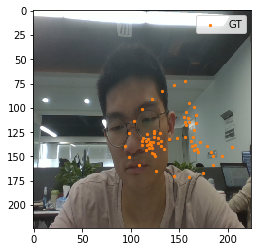

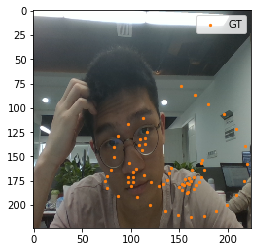

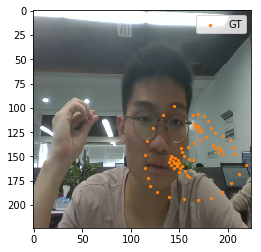

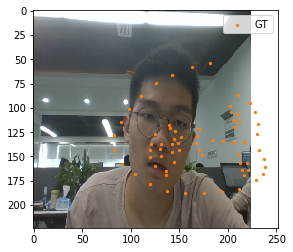

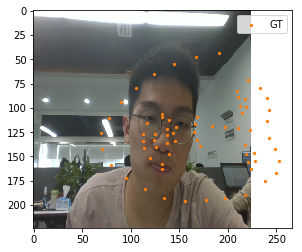

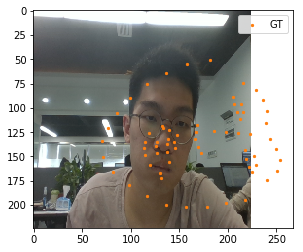

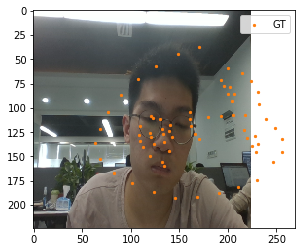

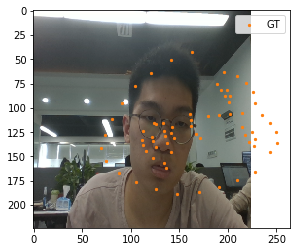

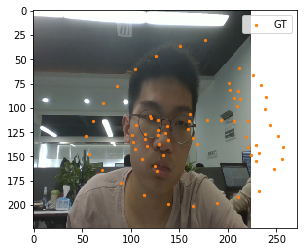

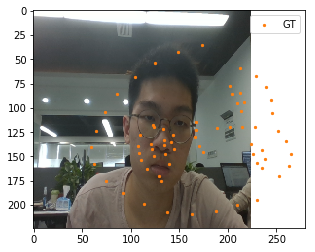

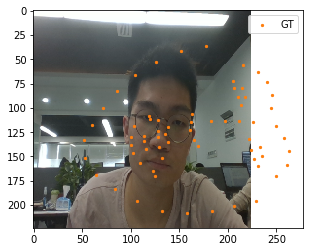

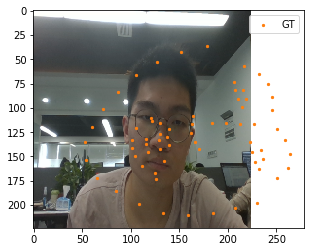

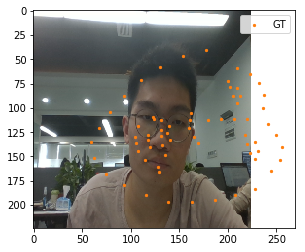

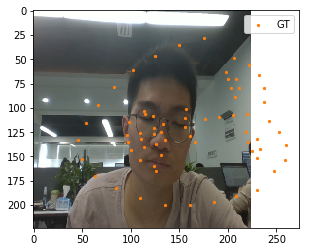

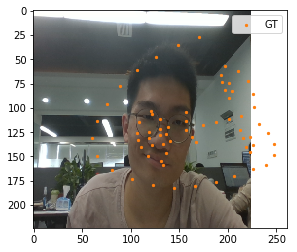

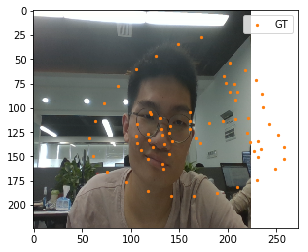

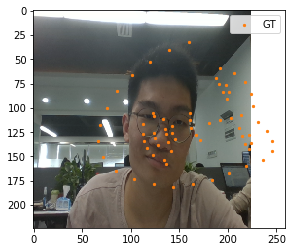

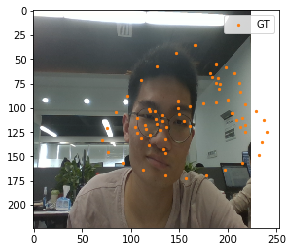

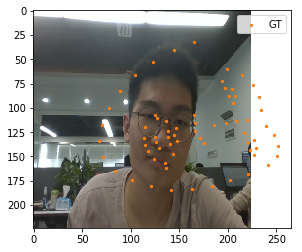

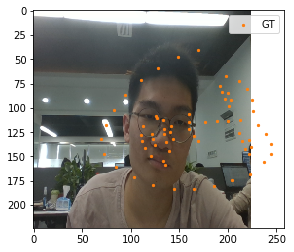

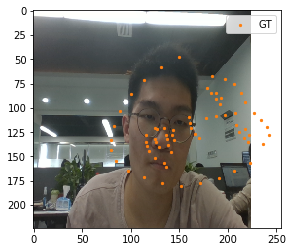

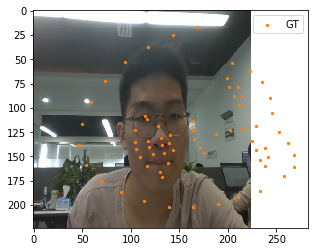

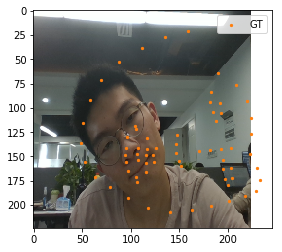

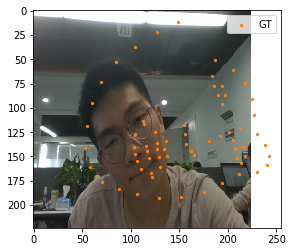

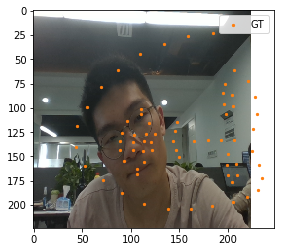

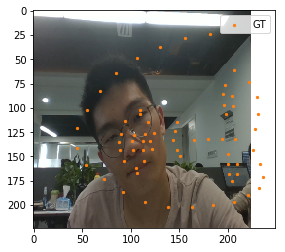

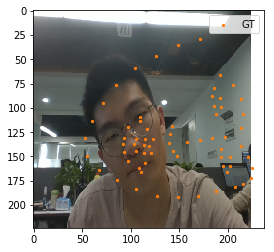

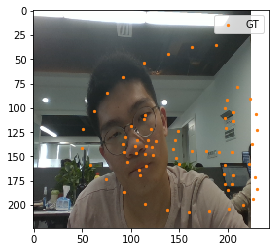

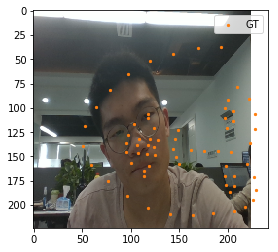

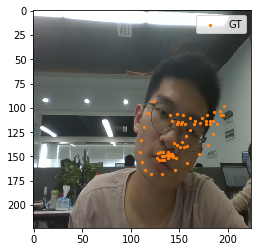

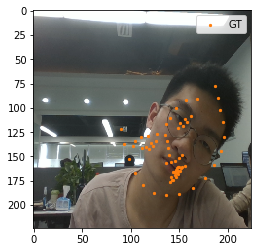

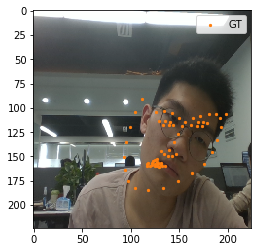

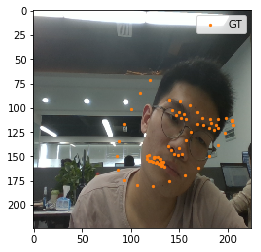

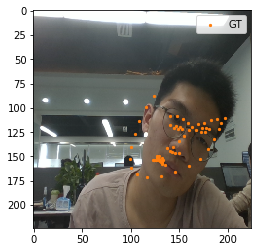

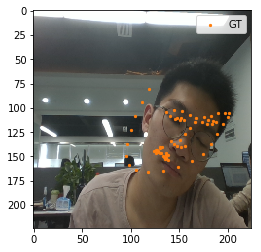

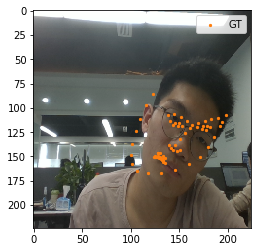

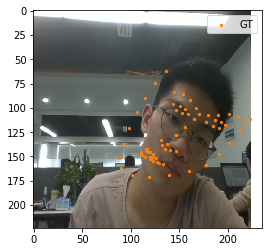

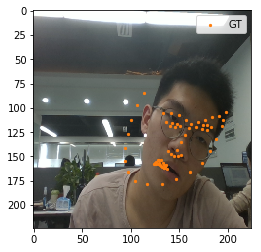

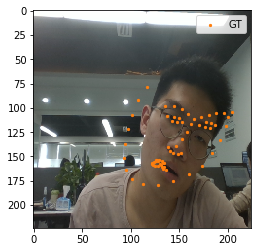

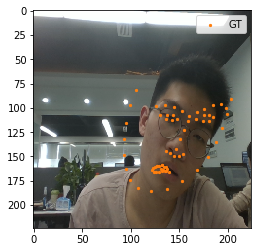

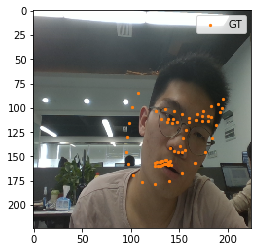

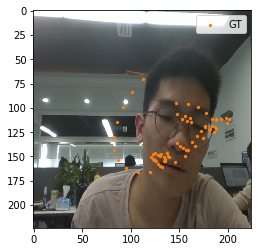

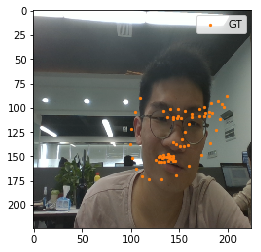

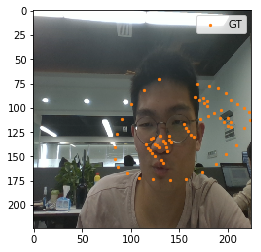

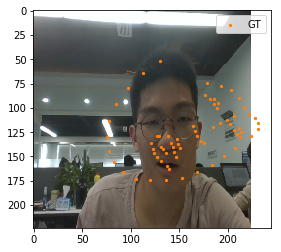

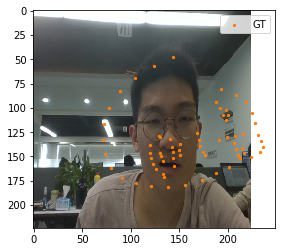

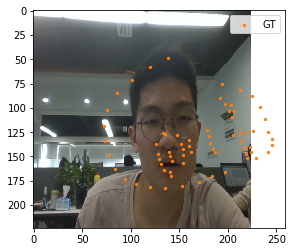

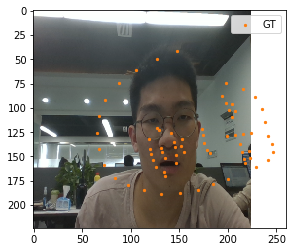

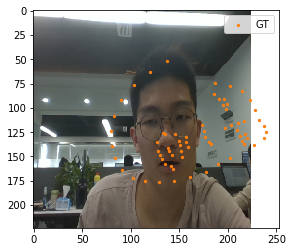

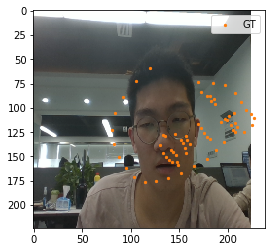

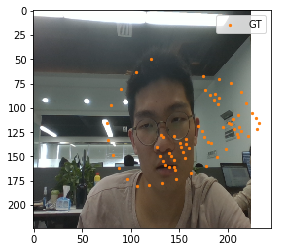

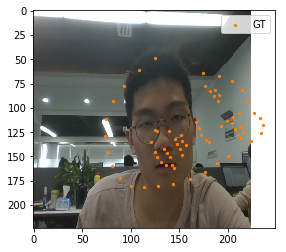

In [ ]:
"""
Predicts file directory with network specified by files to output path

"""

config = Config()
config_dict = config(os.path.abspath(args.config_file))

try:
    net = torch.jit.load(os.path.abspath(args.weight_file))
    net.eval()
    net.cpu()

except RuntimeError:
    net_layer = HomogeneousShapeLayer

    if config_dict["training"].pop("mixed_prec", False):
        try:
            from apex import amp
            amp.init()
        except:
            pass

    shapes = np.load(os.path.abspath(config_dict["layer"].pop("pca_path"))
                    )["shapes"][:config_dict["layer"].pop("num_shape_params") + 1]

    net = SingleShapeNetwork(
        net_layer, {"shapes": shapes,
                    **config_dict["layer"]},
        img_size=config_dict["data"]["img_size"],
        **config_dict["network"])

    try:
        net.load_state_dict(torch.load(
            os.path.abspath(args.weight_file))["state_dict"]["model"])
    except KeyError:
        net.load_state_dict(torch.load(os.path.abspath(args.weight_file)))

    net = net.to("cpu")
    net = net.eval()

data = SingleShapeDataProcessing._get_files(
    os.path.abspath(args.in_path), extensions=[".png", ".jpg"])

def process_sample(sample, img_size, net, device, crop=0.1):
    lmk_bounds = sample.get_landmark_bounds(sample.img)
    min_y, min_x, max_y, max_x = lmk_bounds
    range_x = max_x - min_x
    range_y = max_y - min_y

    max_range = max(range_x, range_y) * (1 + crop)

    center_x = min_x + range_x / 2
    center_y = min_y + range_y / 2

    tmp = sample.crop(center_y - max_range / 2,
                    center_x - max_range / 2,
                    center_y + max_range / 2,
                    center_x + max_range / 2)

    img_tensor = torch.from_numpy(
        tmp.to_grayscale().resize((img_size, img_size)).img.transpose(2, 0, 1)
    ).to(torch.float).unsqueeze(0).to(device)

    pred = net(img_tensor).cpu().numpy()[0]

    pred = pred * np.array([max_range / img_size, max_range / img_size])
    pred = pred + np.asarray([center_y - max_range / 2,
                            center_x - max_range / 2])

    return pred

device = torch.device("cpu")

with torch.no_grad():

    if args.visualize:
        pred_path = os.path.join(os.path.abspath(args.out_path), "pred")
        vis_path = os.path.join(os.path.abspath(args.out_path),
                                "visualization")
        os.makedirs(vis_path, exist_ok=True)
    else:
        pred_path = os.path.abspath(args.out_path)

    os.makedirs(pred_path, exist_ok=True)

    while True:
        ret, frame = cap.read()
        frame = cv2.resize(frame, (224,224))
        cv2.imwrite('./tmp.png', frame)
        _data = SingleShapeSingleImage2D.from_files('./tmp.png')
        pred = process_sample(_data, img_size=config_dict["data"]["img_size"], net=net,
                              device=device)

        fname = os.path.split(_data.img_file)[-1].rsplit(".", 1)[0]

        if args.visualize:
            view_kwargs = {}
            if _data.is_gray:
                view_kwargs["cmap"] = "gray"
            fig = _data.view(True, **view_kwargs)
            plt.gca().scatter(pred[:, 1], pred[:, 0], s=5, c="C1")
            plt.gca().legend(["GT", "Pred"])
            plt.gcf().savefig(os.path.join(vis_path, fname + ".png"))
            plt.show()

#         _data.save(pred_path, fname, "PTS")
        pts_exporter(pred, os.path.join(pred_path, fname + "_pred.pts"))


In [4]:
config_dict

{'network': {'in_channels': 1,
  'norm_type': 'instance',
  'feature_extractor': False},
 'layer': {'pca_path': './data/lfpw/train_pca.npz',
  'num_shape_params': 25,
  'n_dims': 2,
  'use_cpp': False},
 'optimizer': {'lr': 0.0001},
 'scheduler': {'factor': 0.1, 'patience': 5, 'cooldown': 0},
 'training': {'save_path': '../Results/helen',
  'gpu_ids': [0],
  'save_freq': 1,
  'num_epochs': 200,
  'val_score_key': 'val_MSE'},
 'data': {'train_path': '../data/lfpw/trainset',
  'test_path': '../data/lfpw/testset',
  'crop': 0.1,
  'landmark_extension_train': '.pts',
  'landmark_extension_test': '.pts',
  'batch_size': 1,
  'cached': False,
  'num_workers': 1,
  'img_size': 224,
  'rotate_train': 90,
  'rotate_test': 45,
  'offset_train': 30,
  'offset_test': 20},
 'logging': {'enable': False,
  'port': 9999,
  'name': 'LFPW',
  'server': 'http://localhost'}}

In [4]:
import cv2

img = cv2.imread('./inputs/I_0001_04.jpg')
img = cv2.resize(img, (200,200))
cv2.imwrite('./inputs/2.jpg', img)

True

In [4]:
sample.lmk

NameError: name 'sample' is not defined

In [1]:
import shapedata
img = shapedata.SingleShapeSingleImage2D.from_files("./inputs/1.jpg")

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\_collections.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, MutableMapping
C:\ProgramData\Anaconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable


In [7]:
print(img.img.lmk)

AttributeError: 'numpy.ndarray' object has no attribute 'lmk'

In [1]:
import os
import cv2
path = './inputs'
files= os.listdir(path)
for file in files:
    if not os.path.isdir(path + '/' + file):
        name1 = path + '/' + file
        print(name1)
        img = cv2.imread(name1)
        img = cv2.resize(img, (224,224))
        name2 = path + '/in/' + file
        cv2.imwrite(name2, img)


./inputs/1.jpg
./inputs/2.jpg
./inputs/I_0001_07.jpg
./inputs/I_0006_01.jpg
./inputs/I_0006_02.jpg
./inputs/I_0006_03.jpg
./inputs/I_0006_04.jpg
./inputs/I_0006_05.jpg
./inputs/I_0006_06.jpg
./inputs/I_0006_07.jpg
./inputs/I_0006_08.jpg
./inputs/V_0035_01.jpg
./inputs/V_0035_02.jpg
./inputs/V_0035_03.jpg
./inputs/V_0035_04.jpg
./inputs/V_0035_05.jpg
./inputs/V_0035_06.jpg
./inputs/V_0035_07.jpg
./inputs/V_0035_08.jpg
./inputs/V_0035_09.jpg
./inputs/V_0035_10.jpg
./inputs/V_0035_11.jpg
./inputs/V_0035_12.jpg
./inputs/V_0035_13.jpg
./inputs/V_0035_14.jpg
./inputs/V_0035_15.jpg
./inputs/V_0035_16.jpg
./inputs/V_0035_17.jpg
./inputs/V_0035_18.jpg
./inputs/V_0035_19.jpg


In [5]:
name1

'./inputs/in'